<a href="https://colab.research.google.com/github/DasariRishikesh/Stock-Price-Prediction-using-Machine-Learning-models/blob/main/SVM_Model_for_the_Tesla_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUPPORT VECTOR MACHINE


In [ ]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Read the csv file using read_csv
# method of pandas
df = pd.read_csv('/content/tesla.csv')
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2188,11-03-2019,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,12-03-2019,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,13-03-2019,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2191,14-03-2019,292.450012,295.390015,288.290009,289.959991,289.959991,7074200


In [ ]:
# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])
df

# drop The original date column
df = df.drop(['Date'], axis='columns')
df


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-01-07,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-02-07,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-06-07,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...
2019-11-03,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2019-12-03,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2019-03-13,283.899994,291.989990,282.700012,288.959991,288.959991,6844700


In [ ]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()


,Open-Close,High-Low
Date,,
2010-06-29,-4.889999,7.459999
2010-06-30,1.960001,7.120001
2010-01-07,3.040001,5.650000
2010-02-07,3.799999,4.390001
2010-06-07,3.889999,4.170000


In [ ]:
# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y


array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]


In [ ]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)


In [ ]:
df['Predicted_Signal'] = cls.predict(X)


In [ ]:
# Calculate daily returns
df['Return'] = df.Close.pct_change()


In [ ]:
# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)


In [ ]:
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df


,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,-4.889999,7.459999,0,NaN,NaN,NaN
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,1.960001,7.120001,1,-0.002511,-0.000000,-0.002511
2010-01-07,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,3.040001,5.650000,1,-0.078473,-0.078473,-0.080984
2010-02-07,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,3.799999,4.390001,1,-0.125683,-0.125683,-0.206667
2010-06-07,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,3.889999,4.170000,1,-0.160937,-0.160937,-0.367604
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-03,283.519989,291.279999,280.500000,290.920013,290.920013,7392300,-7.400024,10.779999,0,0.023861,0.000000,3.655209
2019-12-03,286.489990,288.070007,281.059998,283.359985,283.359985,7504100,3.130005,7.010009,1,-0.025987,-0.000000,3.629222
2019-03-13,283.899994,291.989990,282.700012,288.959991,288.959991,6844700,-5.059997,9.289978,0,0.019763,0.019763,3.648985


In [ ]:
# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df


,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,-4.889999,7.459999,0,NaN,NaN,NaN,NaN
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,1.960001,7.120001,1,-0.002511,-0.000000,-0.002511,0.000000
2010-01-07,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,3.040001,5.650000,1,-0.078473,-0.078473,-0.080984,-0.078473
2010-02-07,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,3.799999,4.390001,1,-0.125683,-0.125683,-0.206667,-0.204156
2010-06-07,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,3.889999,4.170000,1,-0.160937,-0.160937,-0.367604,-0.365093
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-03,283.519989,291.279999,280.500000,290.920013,290.920013,7392300,-7.400024,10.779999,0,0.023861,0.000000,3.655209,3.615949
2019-12-03,286.489990,288.070007,281.059998,283.359985,283.359985,7504100,3.130005,7.010009,1,-0.025987,-0.000000,3.629222,3.615949
2019-03-13,283.899994,291.989990,282.700012,288.959991,288.959991,6844700,-5.059997,9.289978,0,0.019763,0.019763,3.648985,3.635712


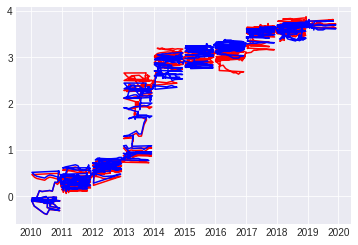

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')


In [ ]:
rms=np.sqrt(np.mean(np.power((df['Cum_Strategy']-df['Cum_Ret']),2)))
rms

0.11257585811501711